## <center> Import Libs

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# Plotting settings
%matplotlib inline
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Warnings
import warnings
warnings.filterwarnings('ignore')


##  <center> Read Data

In [104]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

## <center> Data Information

In [105]:
train_data.head()

,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,K_kg/ga,5_YEARLY_median_AVERAGE_TEMPERATURE,6_YEARLY_median_AVERAGE_TEMPERATURE,7_YEARLY_median_AVERAGE_TEMPERATURE,8_YEARLY_median_AVERAGE_TEMPERATURE,9_YEARLY_median_AVERAGE_TEMPERATURE,5_YEARLY_median_EVAPORATION,6_YEARLY_median_EVAPORATION,7_YEARLY_median_EVAPORATION,8_YEARLY_median_EVAPORATION,9_YEARLY_median_EVAPORATION,5_YEARLY_median_HUMIDITY(%),6_YEARLY_median_HUMIDITY(%),7_YEARLY_median_HUMIDITY(%),8_YEARLY_median_HUMIDITY(%),9_YEARLY_median_HUMIDITY(%),5_YEARLY_sum_CALCULATED_RADIATION,6_YEARLY_sum_CALCULATED_RADIATION,7_YEARLY_sum_CALCULATED_RADIATION,8_YEARLY_sum_CALCULATED_RADIATION,9_YEARLY_sum_CALCULATED_RADIATION,5_YEARLY_sum_RAINFALL,6_YEARLY_sum_RAINFALL,7_YEARLY_sum_RAINFALL,8_YEARLY_sum_RAINFALL,9_YEARLY_sum_RAINFALL,22_WEEK_AVERAGE_TEMPERATURE,23_WEEK_AVERAGE_TEMPERATURE,24_WEEK_AVERAGE_TEMPERATURE,25_WEEK_AVERAGE_TEMPERATURE,26_WEEK_AVERAGE_TEMPERATURE,27_WEEK_AVERAGE_TEMPERATURE,28_WEEK_AVERAGE_TEMPERATURE,29_WEEK_AVERAGE_TEMPERATURE,30_WEEK_AVERAGE_TEMPERATURE,31_WEEK_AVERAGE_TEMPERATURE,32_WEEK_AVERAGE_TEMPERATURE,33_WEEK_AVERAGE_TEMPERATURE,34_WEEK_AVERAGE_TEMPERATURE,35_WEEK_AVERAGE_TEMPERATURE,36_WEEK_AVERAGE_TEMPERATURE,37_WEEK_AVERAGE_TEMPERATURE,38_WEEK_AVERAGE_TEMPERATURE,39_WEEK_AVERAGE_TEMPERATURE,22_WEEK_CALCULATED_RADIATION,23_WEEK_CALCULATED_RADIATION,24_WEEK_CALCULATED_RADIATION,25_WEEK_CALCULATED_RADIATION,26_WEEK_CALCULATED_RADIATION,27_WEEK_CALCULATED_RADIATION,28_WEEK_CALCULATED_RADIATION,29_WEEK_CALCULATED_RADIATION,30_WEEK_CALCULATED_RADIATION,31_WEEK_CALCULATED_RADIATION,32_WEEK_CALCULATED_RADIATION,33_WEEK_CALCULATED_RADIATION,34_WEEK_CALCULATED_RADIATION,35_WEEK_CALCULATED_RADIATION,36_WEEK_CALCULATED_RADIATION,37_WEEK_CALCULATED_RADIATION,38_WEEK_CALCULATED_RADIATION,39_WEEK_CALCULATED_RADIATION,22_WEEK_EVAPORATION,23_WEEK_EVAPORATION,24_WEEK_EVAPORATION,25_WEEK_EVAPORATION,26_WEEK_EVAPORATION,27_WEEK_EVAPORATION,28_WEEK_EVAPORATION,29_WEEK_EVAPORATION,30_WEEK_EVAPORATION,31_WEEK_EVAPORATION,32_WEEK_EVAPORATION,33_WEEK_EVAPORATION,34_WEEK_EVAPORATION,35_WEEK_EVAPORATION,36_WEEK_EVAPORATION,37_WEEK_EVAPORATION,38_WEEK_EVAPORATION,39_WEEK_EVAPORATION,22_WEEK_HUMIDITY(%),23_WEEK_HUMIDITY(%),24_WEEK_HUMIDITY(%),25_WEEK_HUMIDITY(%),26_WEEK_HUMIDITY(%),27_WEEK_HUMIDITY(%),28_WEEK_HUMIDITY(%),29_WEEK_HUMIDITY(%),30_WEEK_HUMIDITY(%),31_WEEK_HUMIDITY(%),32_WEEK_HUMIDITY(%),33_WEEK_HUMIDITY(%),34_WEEK_HUMIDITY(%),35_WEEK_HUMIDITY(%),36_WEEK_HUMIDITY(%),37_WEEK_HUMIDITY(%),38_WEEK_HUMIDITY(%),39_WEEK_HUMIDITY(%),22_WEEK_RAINFALL,23_WEEK_RAINFALL,24_WEEK_RAINFALL,25_WEEK_RAINFALL,26_WEEK_RAINFALL,27_WEEK_RAINFALL,28_WEEK_RAINFALL,29_WEEK_RAINFALL,30_WEEK_RAINFALL,31_WEEK_RAINFALL,32_WEEK_RAINFALL,33_WEEK_RAINFALL,34_WEEK_RAINFALL,35_WEEK_RAINFALL,36_WEEK_RAINFALL,37_WEEK_RAINFALL,38_WEEK_RAINFALL,39_WEEK_RAINFALL,22_WEEK_SUM_ACTIVE_TEMPERATURE,23_WEEK_SUM_ACTIVE_TEMPERATURE,24_WEEK_SUM_ACTIVE_TEMPERATURE,25_WEEK_SUM_ACTIVE_TEMPERATURE,26_WEEK_SUM_ACTIVE_TEMPERATURE,27_WEEK_SUM_ACTIVE_TEMPERATURE,28_WEEK_SUM_ACTIVE_TEMPERATURE,29_WEEK_SUM_ACTIVE_TEMPERATURE,30_WEEK_SUM_ACTIVE_TEMPERATURE,31_WEEK_SUM_ACTIVE_TEMPERATURE,32_WEEK_SUM_ACTIVE_TEMPERATURE,33_WEEK_SUM_ACTIVE_TEMPERATURE,34_WEEK_SUM_ACTIVE_TEMPERATURE,35_WEEK_SUM_ACTIVE_TEMPERATURE,36_WEEK_SUM_ACTIVE_TEMPERATURE,37_WEEK_SUM_ACTIVE_TEMPERATURE,38_WEEK_SUM_ACTIVE_TEMPERATURE,39_WEEK_SUM_ACTIVE_TEMPERATURE,22_week_ndvi,23_week_ndvi,24_week_ndvi,25_week_ndvi,26_week_ndvi,27_week_ndvi,28_week_ndvi,29_week_ndvi,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
0,1310,2019,1,79.263,129.077355,12,0,320.0,222.330633,52.239128,51.227811,15.271015,18.952164,20.720288,20.079206,14.824729,3.34,3.805,3.83,3.23,2.01,65.0,67.0,67.0,65.0,71.0,9779661.0,10016516.0,10183113.0,8751805.0,6020978.0,804.38,1084.33,816.05,647.02,572.23,19.470000,20.340000,24.260000,22.860000,22.590000,20.000000,16.390000,17.9

### Train data

In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Columns: 162 entries, Field to 39_week_ndvi
dtypes: float64(157), int64(5)
memory usage: 7.1 MB


In [107]:
train_data.describe()

,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,K_kg/ga,5_YEARLY_median_AVERAGE_TEMPERATURE,6_YEARLY_median_AVERAGE_TEMPERATURE,7_YEARLY_median_AVERAGE_TEMPERATURE,8_YEARLY_median_AVERAGE_TEMPERATURE,9_YEARLY_median_AVERAGE_TEMPERATURE,5_YEARLY_median_EVAPORATION,6_YEARLY_median_EVAPORATION,7_YEARLY_median_EVAPORATION,8_YEARLY_median_EVAPORATION,9_YEARLY_median_EVAPORATION,5_YEARLY_median_HUMIDITY(%),6_YEARLY_median_HUMIDITY(%),7_YEARLY_median_HUMIDITY(%),8_YEARLY_median_HUMIDITY(%),9_YEARLY_median_HUMIDITY(%),5_YEARLY_sum_CALCULATED_RADIATION,6_YEARLY_sum_CALCULATED_RADIATION,7_YEARLY_sum_CALCULATED_RADIATION,8_YEARLY_sum_CALCULATED_RADIATION,9_YEARLY_sum_CALCULATED_RADIATION,5_YEARLY_sum_RAINFALL,6_YEARLY_sum_RAINFALL,7_YEARLY_sum_RAINFALL,8_YEARLY_sum_RAINFALL,9_YEARLY_sum_RAINFALL,22_WEEK_AVERAGE_TEMPERATURE,23_WEEK_AVERAGE_TEMPERATURE,24_WEEK_AVERAGE_TEMPERATURE,25_WEEK_AVERAGE_TEMPERATURE,26_WEEK_AVERAGE_TEMPERATURE,27_WEEK_AVERAGE_TEMPERATURE,28_WEEK_AVERAGE_TEMPERATURE,29_WEEK_AVERAGE_TEMPERATURE,30_WEEK_AVERAGE_TEMPERATURE,31_WEEK_AVERAGE_TEMPERATURE,32_WEEK_AVERAGE_TEMPERATURE,33_WEEK_AVERAGE_TEMPERATURE,34_WEEK_AVERAGE_TEMPERATURE,35_WEEK_AVERAGE_TEMPERATURE,36_WEEK_AVERAGE_TEMPERATURE,37_WEEK_AVERAGE_TEMPERATURE,38_WEEK_AVERAGE_TEMPERATURE,39_WEEK_AVERAGE_TEMPERATURE,22_WEEK_CALCULATED_RADIATION,23_WEEK_CALCULATED_RADIATION,24_WEEK_CALCULATED_RADIATION,25_WEEK_CALCULATED_RADIATION,26_WEEK_CALCULATED_RADIATION,27_WEEK_CALCULATED_RADIATION,28_WEEK_CALCULATED_RADIATION,29_WEEK_CALCULATED_RADIATION,30_WEEK_CALCULATED_RADIATION,31_WEEK_CALCULATED_RADIATION,32_WEEK_CALCULATED_RADIATION,33_WEEK_CALCULATED_RADIATION,34_WEEK_CALCULATED_RADIATION,35_WEEK_CALCULATED_RADIATION,36_WEEK_CALCULATED_RADIATION,37_WEEK_CALCULATED_RADIATION,38_WEEK_CALCULATED_RADIATION,39_WEEK_CALCULATED_RADIATION,22_WEEK_EVAPORATION,23_WEEK_EVAPORATION,24_WEEK_EVAPORATION,25_WEEK_EVAPORATION,26_WEEK_EVAPORATION,27_WEEK_EVAPORATION,28_WEEK_EVAPORATION,29_WEEK_EVAPORATION,30_WEEK_EVAPORATION,31_WEEK_EVAPORATION,32_WEEK_EVAPORATION,33_WEEK_EVAPORATION,34_WEEK_EVAPORATION,35_WEEK_EVAPORATION,36_WEEK_EVAPORATION,37_WEEK_EVAPORATION,38_WEEK_EVAPORATION,39_WEEK_EVAPORATION,22_WEEK_HUMIDITY(%),23_WEEK_HUMIDITY(%),24_WEEK_HUMIDITY(%),25_WEEK_HUMIDITY(%),26_WEEK_HUMIDITY(%),27_WEEK_HUMIDITY(%),28_WEEK_HUMIDITY(%),29_WEEK_HUMIDITY(%),30_WEEK_HUMIDITY(%),31_WEEK_HUMIDITY(%),32_WEEK_HUMIDITY(%),33_WEEK_HUMIDITY(%),34_WEEK_HUMIDITY(%),35_WEEK_HUMIDITY(%),36_WEEK_HUMIDITY(%),37_WEEK_HUMIDITY(%),38_WEEK_HUMIDITY(%),39_WEEK_HUMIDITY(%),22_WEEK_RAINFALL,23_WEEK_RAINFALL,24_WEEK_RAINFALL,25_WEEK_RAINFALL,26_WEEK_RAINFALL,27_WEEK_RAINFALL,28_WEEK_RAINFALL,29_WEEK_RAINFALL,30_WEEK_RAINFALL,31_WEEK_RAINFALL,32_WEEK_RAINFALL,33_WEEK_RAINFALL,34_WEEK_RAINFALL,35_WEEK_RAINFALL,36_WEEK_RAINFALL,37_WEEK_RAINFALL,38_WEEK_RAINFALL,39_WEEK_RAINFALL,22_WEEK_SUM_ACTIVE_TEMPERATURE,23_WEEK_SUM_ACTIVE_TEMPERATURE,24_WEEK_SUM_ACTIVE_TEMPERATURE,25_WEEK_SUM_ACTIVE_TEMPERATURE,26_WEEK_SUM_ACTIVE_TEMPERATURE,27_WEEK_SUM_ACTIVE_TEMPERATURE,28_WEEK_SUM_ACTIVE_TEMPERATURE,29_WEEK_SUM_ACTIVE_TEMPERATURE,30_WEEK_SUM_ACTIVE_TEMPERATURE,31_WEEK_SUM_ACTIVE_TEMPERATURE,32_WEEK_SUM_ACTIVE_TEMPERATURE,33_WEEK_SUM_ACTIVE_TEMPERATURE,34_WEEK_SUM_ACTIVE_TEMPERATURE,35_WEEK_SUM_ACTIVE_TEMPERATURE,36_WEEK_SUM_ACTIVE_TEMPERATURE,37_WEEK_SUM_ACTIVE_TEMPERATURE,38_WEEK_SUM_ACTIVE_TEMPERATURE,39_WEEK_SUM_ACTIVE_TEMPERATURE,22_week_ndvi,23_week_ndvi,24_week_ndvi,25_week_ndvi,26_week_ndvi,27_week_ndvi,28_week_ndvi,29_week_ndvi,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
count,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,4944.000000,5734.000000,5507.000000,5399.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5.734000e+03,5.7340

### Test data

In [108]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Columns: 162 entries, Field to 39_week_ndvi
dtypes: float64(156), int64(6)
memory usage: 2.7 MB


In [109]:
test_data.describe()

,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,K_kg/ga,5_YEARLY_median_AVERAGE_TEMPERATURE,6_YEARLY_median_AVERAGE_TEMPERATURE,7_YEARLY_median_AVERAGE_TEMPERATURE,8_YEARLY_median_AVERAGE_TEMPERATURE,9_YEARLY_median_AVERAGE_TEMPERATURE,5_YEARLY_median_EVAPORATION,6_YEARLY_median_EVAPORATION,7_YEARLY_median_EVAPORATION,8_YEARLY_median_EVAPORATION,9_YEARLY_median_EVAPORATION,5_YEARLY_median_HUMIDITY(%),6_YEARLY_median_HUMIDITY(%),7_YEARLY_median_HUMIDITY(%),8_YEARLY_median_HUMIDITY(%),9_YEARLY_median_HUMIDITY(%),5_YEARLY_sum_CALCULATED_RADIATION,6_YEARLY_sum_CALCULATED_RADIATION,7_YEARLY_sum_CALCULATED_RADIATION,8_YEARLY_sum_CALCULATED_RADIATION,9_YEARLY_sum_CALCULATED_RADIATION,5_YEARLY_sum_RAINFALL,6_YEARLY_sum_RAINFALL,7_YEARLY_sum_RAINFALL,8_YEARLY_sum_RAINFALL,9_YEARLY_sum_RAINFALL,22_WEEK_AVERAGE_TEMPERATURE,23_WEEK_AVERAGE_TEMPERATURE,24_WEEK_AVERAGE_TEMPERATURE,25_WEEK_AVERAGE_TEMPERATURE,26_WEEK_AVERAGE_TEMPERATURE,27_WEEK_AVERAGE_TEMPERATURE,28_WEEK_AVERAGE_TEMPERATURE,29_WEEK_AVERAGE_TEMPERATURE,30_WEEK_AVERAGE_TEMPERATURE,31_WEEK_AVERAGE_TEMPERATURE,32_WEEK_AVERAGE_TEMPERATURE,33_WEEK_AVERAGE_TEMPERATURE,34_WEEK_AVERAGE_TEMPERATURE,35_WEEK_AVERAGE_TEMPERATURE,36_WEEK_AVERAGE_TEMPERATURE,37_WEEK_AVERAGE_TEMPERATURE,38_WEEK_AVERAGE_TEMPERATURE,39_WEEK_AVERAGE_TEMPERATURE,22_WEEK_CALCULATED_RADIATION,23_WEEK_CALCULATED_RADIATION,24_WEEK_CALCULATED_RADIATION,25_WEEK_CALCULATED_RADIATION,26_WEEK_CALCULATED_RADIATION,27_WEEK_CALCULATED_RADIATION,28_WEEK_CALCULATED_RADIATION,29_WEEK_CALCULATED_RADIATION,30_WEEK_CALCULATED_RADIATION,31_WEEK_CALCULATED_RADIATION,32_WEEK_CALCULATED_RADIATION,33_WEEK_CALCULATED_RADIATION,34_WEEK_CALCULATED_RADIATION,35_WEEK_CALCULATED_RADIATION,36_WEEK_CALCULATED_RADIATION,37_WEEK_CALCULATED_RADIATION,38_WEEK_CALCULATED_RADIATION,39_WEEK_CALCULATED_RADIATION,22_WEEK_EVAPORATION,23_WEEK_EVAPORATION,24_WEEK_EVAPORATION,25_WEEK_EVAPORATION,26_WEEK_EVAPORATION,27_WEEK_EVAPORATION,28_WEEK_EVAPORATION,29_WEEK_EVAPORATION,30_WEEK_EVAPORATION,31_WEEK_EVAPORATION,32_WEEK_EVAPORATION,33_WEEK_EVAPORATION,34_WEEK_EVAPORATION,35_WEEK_EVAPORATION,36_WEEK_EVAPORATION,37_WEEK_EVAPORATION,38_WEEK_EVAPORATION,39_WEEK_EVAPORATION,22_WEEK_HUMIDITY(%),23_WEEK_HUMIDITY(%),24_WEEK_HUMIDITY(%),25_WEEK_HUMIDITY(%),26_WEEK_HUMIDITY(%),27_WEEK_HUMIDITY(%),28_WEEK_HUMIDITY(%),29_WEEK_HUMIDITY(%),30_WEEK_HUMIDITY(%),31_WEEK_HUMIDITY(%),32_WEEK_HUMIDITY(%),33_WEEK_HUMIDITY(%),34_WEEK_HUMIDITY(%),35_WEEK_HUMIDITY(%),36_WEEK_HUMIDITY(%),37_WEEK_HUMIDITY(%),38_WEEK_HUMIDITY(%),39_WEEK_HUMIDITY(%),22_WEEK_RAINFALL,23_WEEK_RAINFALL,24_WEEK_RAINFALL,25_WEEK_RAINFALL,26_WEEK_RAINFALL,27_WEEK_RAINFALL,28_WEEK_RAINFALL,29_WEEK_RAINFALL,30_WEEK_RAINFALL,31_WEEK_RAINFALL,32_WEEK_RAINFALL,33_WEEK_RAINFALL,34_WEEK_RAINFALL,35_WEEK_RAINFALL,36_WEEK_RAINFALL,37_WEEK_RAINFALL,38_WEEK_RAINFALL,39_WEEK_RAINFALL,22_WEEK_SUM_ACTIVE_TEMPERATURE,23_WEEK_SUM_ACTIVE_TEMPERATURE,24_WEEK_SUM_ACTIVE_TEMPERATURE,25_WEEK_SUM_ACTIVE_TEMPERATURE,26_WEEK_SUM_ACTIVE_TEMPERATURE,27_WEEK_SUM_ACTIVE_TEMPERATURE,28_WEEK_SUM_ACTIVE_TEMPERATURE,29_WEEK_SUM_ACTIVE_TEMPERATURE,30_WEEK_SUM_ACTIVE_TEMPERATURE,31_WEEK_SUM_ACTIVE_TEMPERATURE,32_WEEK_SUM_ACTIVE_TEMPERATURE,33_WEEK_SUM_ACTIVE_TEMPERATURE,34_WEEK_SUM_ACTIVE_TEMPERATURE,35_WEEK_SUM_ACTIVE_TEMPERATURE,36_WEEK_SUM_ACTIVE_TEMPERATURE,37_WEEK_SUM_ACTIVE_TEMPERATURE,38_WEEK_SUM_ACTIVE_TEMPERATURE,39_WEEK_SUM_ACTIVE_TEMPERATURE,22_week_ndvi,23_week_ndvi,24_week_ndvi,25_week_ndvi,26_week_ndvi,27_week_ndvi,28_week_ndvi,29_week_ndvi,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
count,2192.000000,2192.0,2192.000000,2192.000000,2192.0,2192.000000,2192.000000,1691.000000,2192.000000,1963.000000,1961.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2.192000e+03,2.192000e+03,2.1

### Check for uncommon column names

In [110]:
uncommon_columns = set(train_data.columns).symmetric_difference(set(test_data.columns))
print(f'Uncommon columns: {uncommon_columns}')

Uncommon columns: set()


## <center> Null values / duplications check

In [111]:
total_items = len(train_data)
columns_with_null = train_data.isnull().sum()/total_items*100

print(f'Null values in train dataset in %: \n{columns_with_null[columns_with_null > 0]}')

Null values in train dataset in %: 
FAO        13.777468
P_kg/ga     3.958842
K_kg/ga     5.842344
dtype: float64


In [112]:
total_items = len(test_data)
columns_with_null = test_data.isnull().sum()/total_items*100

print(f'Null values in train dataset in %: \n{columns_with_null[columns_with_null > 0]}')

Null values in train dataset in %: 
FAO        22.855839
P_kg/ga    10.447080
K_kg/ga    10.538321
dtype: float64


In [113]:
print(f'Duplicated rows in train data: {train_data.duplicated().sum()}')
print(f'Duplicated rows in test data: {test_data.duplicated().sum()}')

Duplicated rows in train data: 47
Duplicated rows in test data: 0


## <center> Column names validation

In [114]:
column_mapping = {
    'N_kg/ga' : 'nitrogen_fertilizer_amount',
    'P_kg/ga' : 'phosphorus_fertilizer_amount',
    'K_kg/ga' : 'potassium_fertilizer_amount'
}

train_data.rename(columns=column_mapping, inplace=True)
test_data.rename(columns=column_mapping, inplace=True)

In [115]:
replacement_dict = {
    r'\(\%\)' : ''
}

def create_column_mapping(dataframe:pd.DataFrame, replacement_dict:dict):
    for to_replace, replacement in replacement_dict.items():
        dataframe.columns = dataframe.columns.str.replace(to_replace, replacement).str.lower()
    return dataframe

train_data = create_column_mapping(train_data, replacement_dict)
test_data = create_column_mapping(test_data, replacement_dict)

## <center> Validate dtypes

In [116]:
categorical_columns = ['field', 'year', 'cluster', 'geozone', 'predecessor']

train_data[categorical_columns] = train_data[categorical_columns].astype('category')
test_data[categorical_columns] = test_data[categorical_columns].astype('category')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Columns: 162 entries, field to 39_week_ndvi
dtypes: category(5), float64(157)
memory usage: 7.1 MB


## <center> Drop duplicates

In [117]:
train_data.drop_duplicates(inplace=True)

print(f'Duplicated rows in train data: {train_data.duplicated().sum()}')

Duplicated rows in train data: 0


## <center> EDA Check categorical features

In [118]:
def plot_categorical_distribution(train_data: pd.DataFrame, test_data: pd.DataFrame, column_name: str):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))

    # Plot count plots for train dataset
    sns.countplot(
        x=column_name, 
        data=train_data, 
        palette="pastel", 
        order=train_data[column_name].value_counts().index.sort_values(), 
        ax=axes[0][0]
    )
    axes[0][0].set_xlabel(column_name)
    axes[0][0].set_ylabel("count")
    axes[0][0].set_title("Train Dataset - Categorical Feature Distribution")

    # Plot pie chart for train dataset
    type_values_train = train_data[column_name].value_counts().index
    type_counts_train = train_data[column_name].value_counts().values
    axes[1][0].pie(
        type_counts_train, 
        labels=type_values_train, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("pastel"), 
        wedgeprops=dict(width=0.4)
    )
    axes[1][0].set_title(f'Train Dataset - {column_name} Distribution')

    # Plot count plots for test dataset
    sns.countplot(
        x=column_name, 
        data=test_data, 
        palette="pastel", 
        order=test_data[column_name].value_counts().index.sort_values(), 
        ax=axes[0][1]
    )
    axes[0][1].set_xlabel(column_name)
    axes[0][1].set_ylabel("count")
    axes[0][1].set_title("Test Dataset - Categorical Feature Distribution")

    # Plot pie chart for test dataset
    type_values_test = test_data[column_name].value_counts().index
    type_counts_test = test_data[column_name].value_counts().values
    axes[1][1].pie(
        type_counts_test, 
        labels=type_values_test, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("pastel"), 
        wedgeprops=dict(width=0.4)
    )
    axes[1][1].set_title(f'Test Dataset - {column_name} Distribution')

    plt.tight_layout()
    plt.show()

### year column

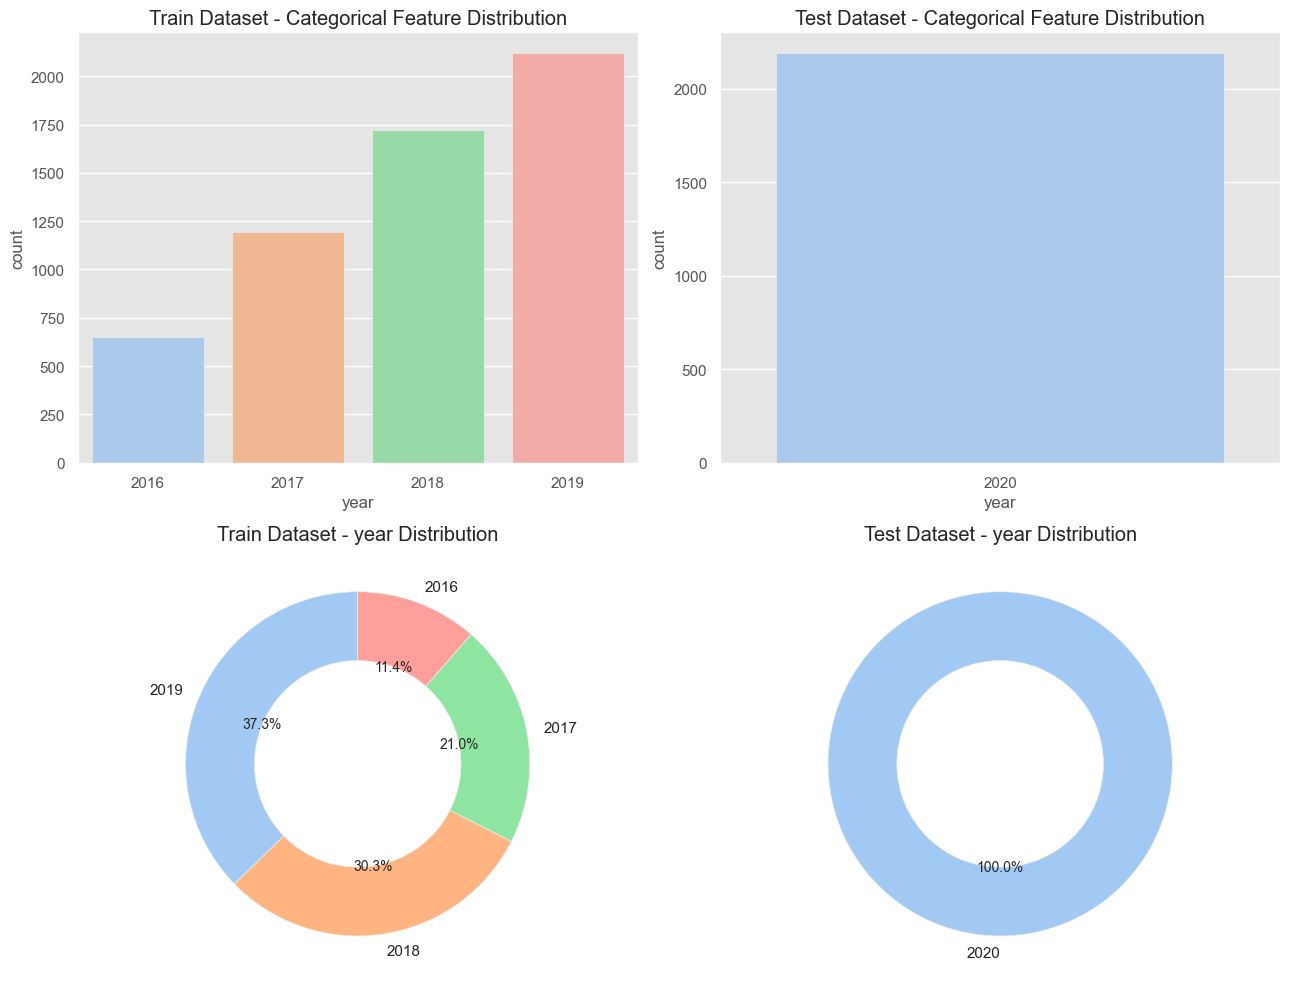

In [119]:
plot_categorical_distribution(train_data, test_data, 'year')

### cluster column

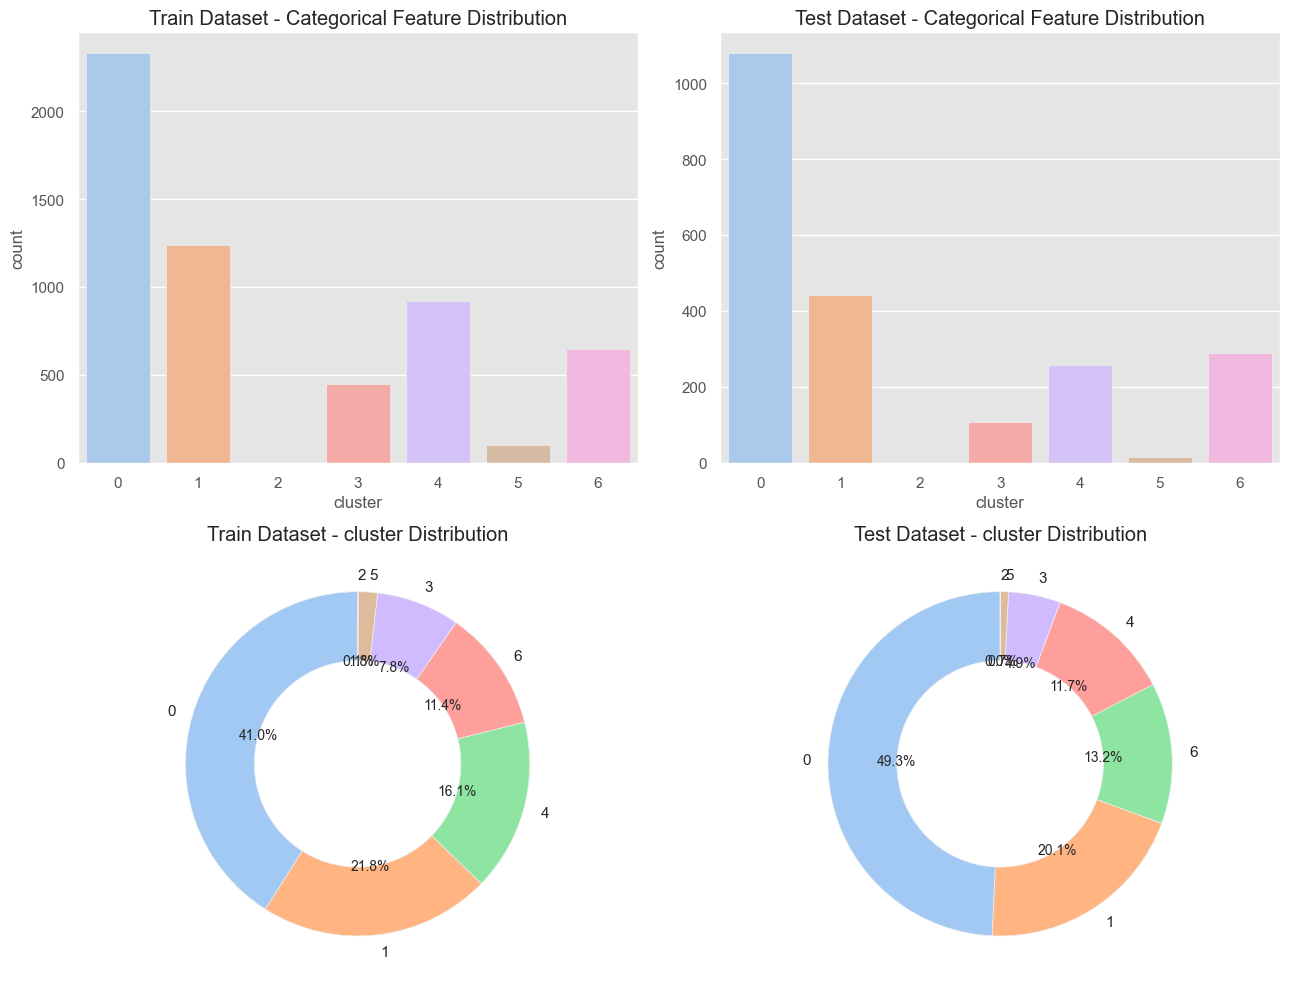

In [120]:
plot_categorical_distribution(train_data, test_data, 'cluster')

### geozone column

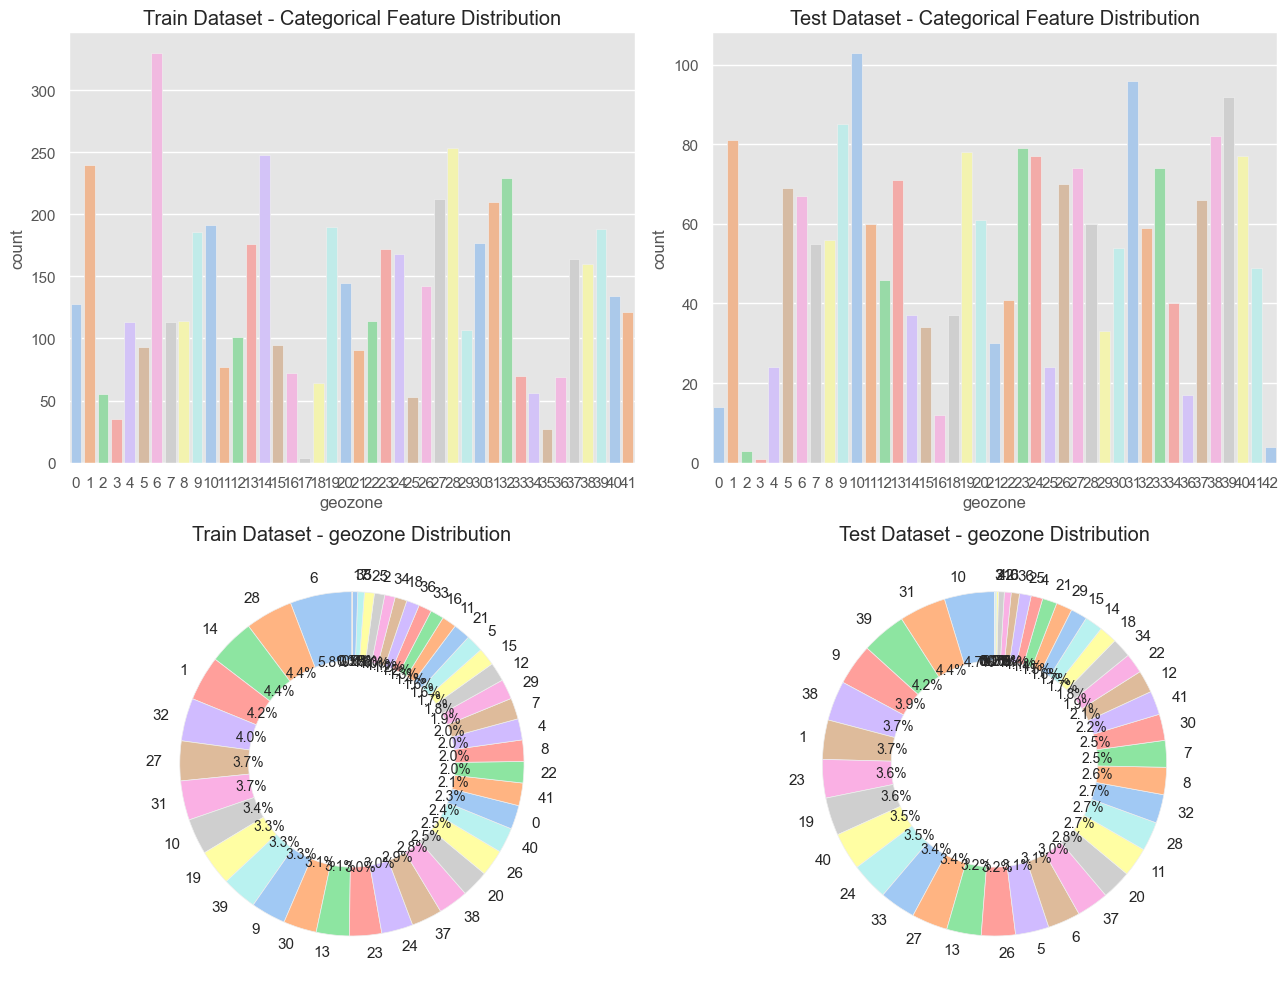

In [121]:
plot_categorical_distribution(train_data, test_data, 'geozone')

### predecessor column

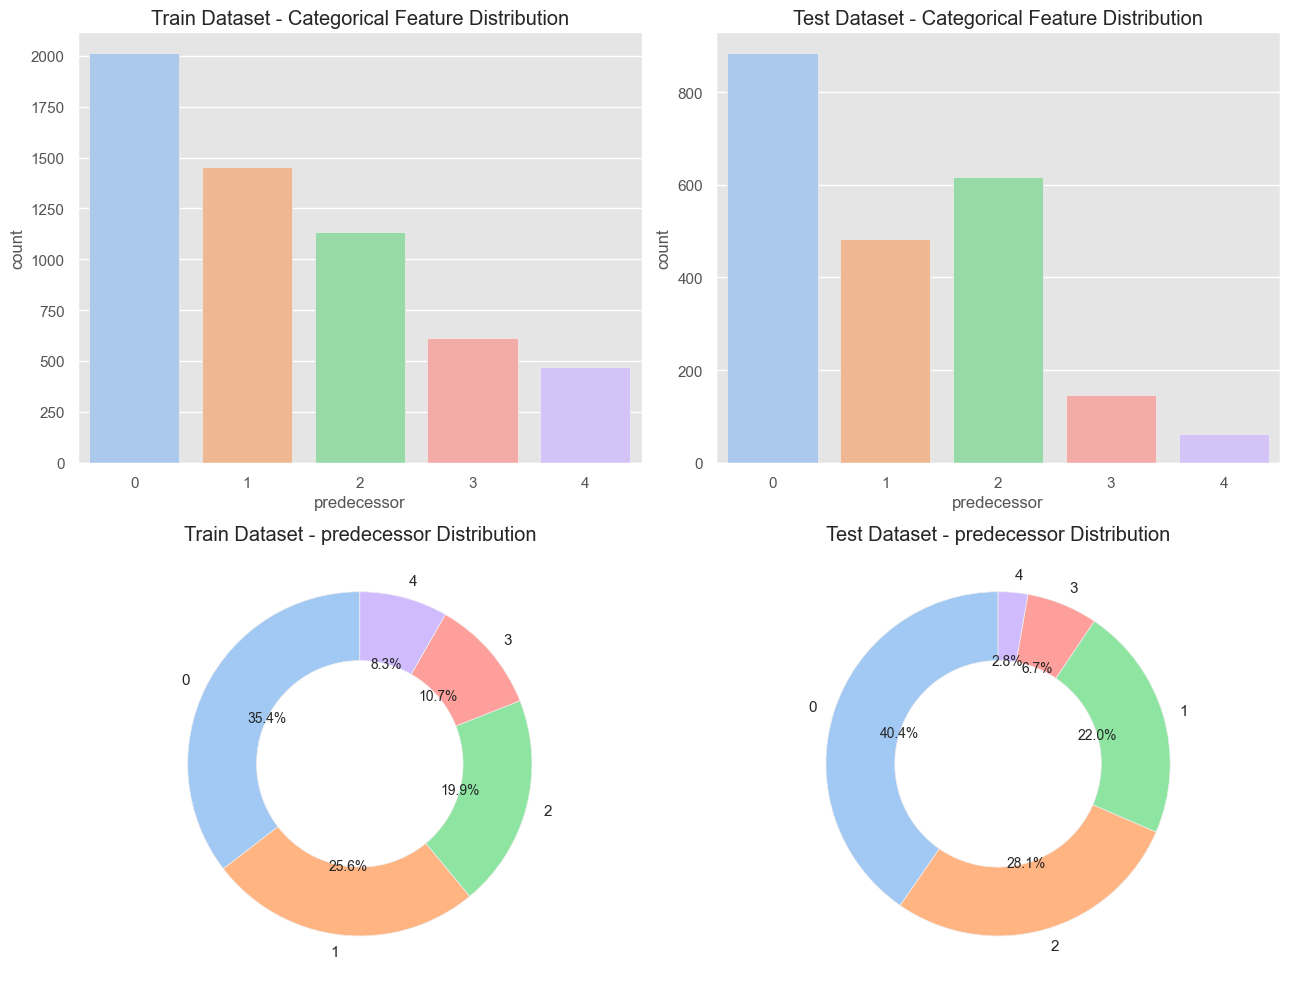

In [122]:
plot_categorical_distribution(train_data, test_data, 'predecessor')

## <center> Check unseen categories 

In [123]:
for column_name in categorical_columns:
    print(f'{column_name}: {set(test_data[column_name].unique()) - set(train_data[column_name].unique())}')

field: {2066, 2067, 2068, 2069, 2070, 2071, 4138, 48, 49, 50, 51, 52, 53, 2100, 60, 4165, 4166, 4167, 4168, 4169, 4170, 4171, 4172, 4173, 4174, 92, 93, 105, 106, 107, 108, 111, 112, 117, 150, 152, 157, 2205, 2206, 2207, 2208, 2209, 2211, 163, 2210, 2212, 2214, 2213, 2215, 2237, 2238, 2239, 2240, 212, 213, 214, 216, 2273, 296, 297, 304, 2363, 2364, 2365, 325, 326, 327, 328, 329, 332, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 336, 340, 2393, 2394, 2395, 341, 344, 349, 350, 2391, 2392, 354, 360, 2409, 361, 363, 369, 370, 374, 383, 386, 390, 2466, 2467, 457, 2525, 2526, 2548, 2549, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 542, 2601, 2603, 2604, 2605, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2650, 2651, 2652, 2653, 2656, 2657, 2658, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 632, 633, 642, 644, 645, 654, 660, 27

In [124]:
test_data[test_data['geozone'] == 42]

,field,year,cluster,area,yield,geozone,predecessor,fao,nitrogen_fertilizer_amount,phosphorus_fertilizer_amount,potassium_fertilizer_amount,5_yearly_median_average_temperature,6_yearly_median_average_temperature,7_yearly_median_average_temperature,8_yearly_median_average_temperature,9_yearly_median_average_temperature,5_yearly_median_evaporation,6_yearly_median_evaporation,7_yearly_median_evaporation,8_yearly_median_evaporation,9_yearly_median_evaporation,5_yearly_median_humidity,6_yearly_median_humidity,7_yearly_median_humidity,8_yearly_median_humidity,9_yearly_median_humidity,5_yearly_sum_calculated_radiation,6_yearly_sum_calculated_radiation,7_yearly_sum_calculated_radiation,8_yearly_sum_calculated_radiation,9_yearly_sum_calculated_radiation,5_yearly_sum_rainfall,6_yearly_sum_rainfall,7_yearly_sum_rainfall,8_yearly_sum_rainfall,9_yearly_sum_rainfall,22_week_average_temperature,23_week_average_temperature,24_week_average_temperature,25_week_average_temperature,26_week_average_temperature,27_week_average_temperature,28_week_average_temperature,29_week_average_temperature,30_week_average_temperature,31_week_average_temperature,32_week_average_temperature,33_week_average_temperature,34_week_average_temperature,35_week_average_temperature,36_week_average_temperature,37_week_average_temperature,38_week_average_temperature,39_week_average_temperature,22_week_calculated_radiation,23_week_calculated_radiation,24_week_calculated_radiation,25_week_calculated_radiation,26_week_calculated_radiation,27_week_calculated_radiation,28_week_calculated_radiation,29_week_calculated_radiation,30_week_calculated_radiation,31_week_calculated_radiation,32_week_calculated_radiation,33_week_calculated_radiation,34_week_calculated_radiation,35_week_calculated_radiation,36_week_calculated_radiation,37_week_calculated_radiation,38_week_calculated_radiation,39_week_calculated_radiation,22_week_evaporation,23_week_evaporation,24_week_evaporation,25_week_evaporation,26_week_evaporation,27_week_evaporation,28_week_evaporation,29_week_evaporation,30_week_evaporation,31_week_evaporation,32_week_evaporation,33_week_evaporation,34_week_evaporation,35_week_evaporation,36_week_evaporation,37_week_evaporation,38_week_evaporation,39_week_evaporation,22_week_humidity,23_week_humidity,24_week_humidity,25_week_humidity,26_week_humidity,27_week_humidity,28_week_humidity,29_week_humidity,30_week_humidity,31_week_humidity,32_week_humidity,33_week_humidity,34_week_humidity,35_week_humidity,36_week_humidity,37_week_humidity,38_week_humidity,39_week_humidity,22_week_rainfall,23_week_rainfall,24_week_rainfall,25_week_rainfall,26_week_rainfall,27_week_rainfall,28_week_rainfall,29_week_rainfall,30_week_rainfall,31_week_rainfall,32_week_rainfall,33_week_rainfall,34_week_rainfall,35_week_rainfall,36_week_rainfall,37_week_rainfall,38_week_rainfall,39_week_rainfall,22_week_sum_active_temperature,23_week_sum_active_temperature,24_week_sum_active_temperature,25_week_sum_active_temperature,26_week_sum_active_temperature,27_week_sum_active_temperature,28_week_sum_active_temperature,29_week_sum_active_temperature,30_week_sum_active_temperature,31_week_sum_active_temperature,32_week_sum_active_temperature,33_week_sum_active_temperature,34_week_sum_active_temperature,35_week_sum_active_temperature,36_week_sum_active_temperature,37_week_sum_active_temperature,38_week_sum_active_temperature,39_week_sum_active_temperature,22_week_ndvi,23_week_ndvi,24_week_ndvi,25_week_ndvi,26_week_ndvi,27_week_ndvi,28_week_ndvi,29_week_ndvi,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
2188,3002,2020,5,102.733,0,42,1,320.0,106.382623,38.176535,22.706141,16.33,20.165377,21.852731,21.346554,15.782697,4.1,5.08,4.95,4.05,2.13,61.0,58.0,61.0,54.0,63.0,14618111.0,15359101.0,15407815.0,13659292.0,9118461.0,622.52,604.51,690.22,372.36,449.61,14.64,15.06,24.63,23.06,22.07,23.87,22.84,20.36,21.47,23.97,22.71,18.44,22.73,20.71,23.94,17.

## <center> Check Numerical columns

In [125]:
def create_combined_distribution_plot(dataframe, keyword):
    # Find features that contain the specified keyword
    matching_features = [col for col in dataframe.columns if keyword in col.lower()]

    # Set up the figure
    plt.figure(figsize=(10, 6))

    # Create distribution plots for each matching feature on the same axes
    for i, feature in enumerate(matching_features):
        sns.kdeplot(dataframe[feature], label=f'{feature}', fill=True)

    # Add labels and legend
    plt.title(f'Distribution Plots for Features Containing "{keyword}"')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    # Show the plot
    plt.show()


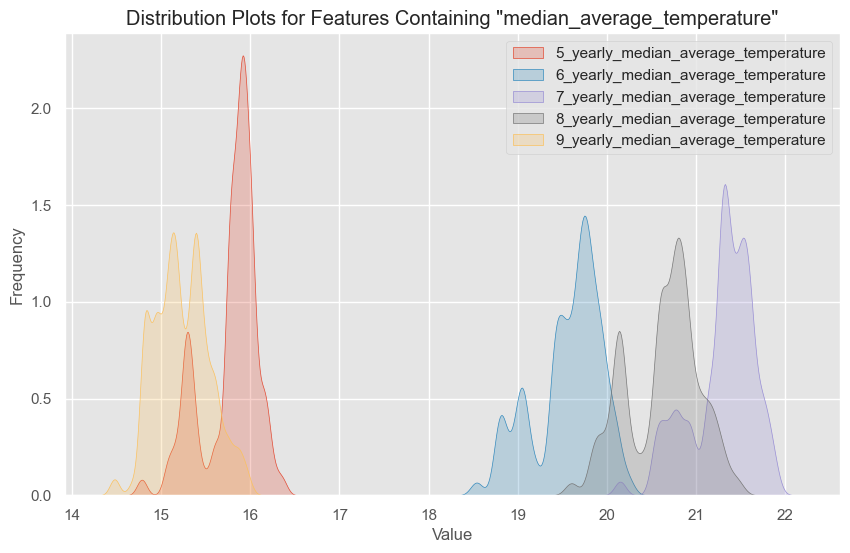

In [126]:
create_combined_distribution_plot(train_data, 'median_average_temperature')

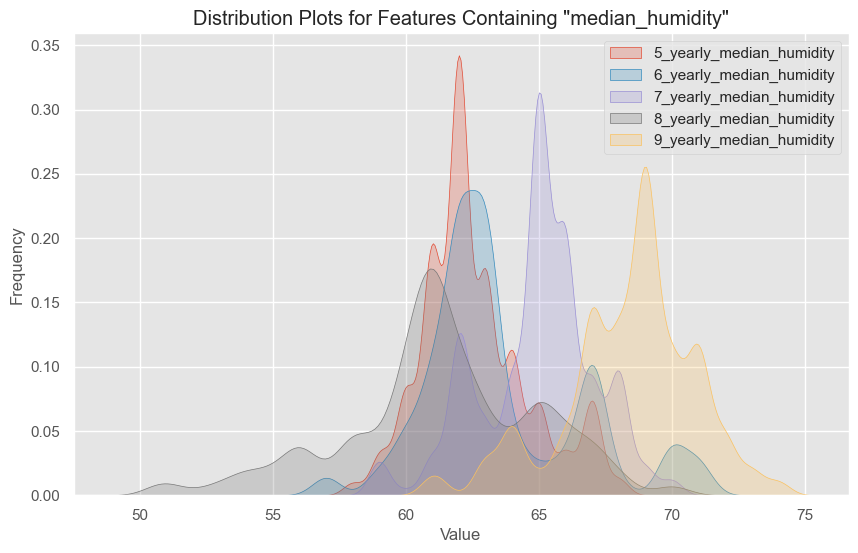

In [127]:
create_combined_distribution_plot(train_data, 'median_humidity')

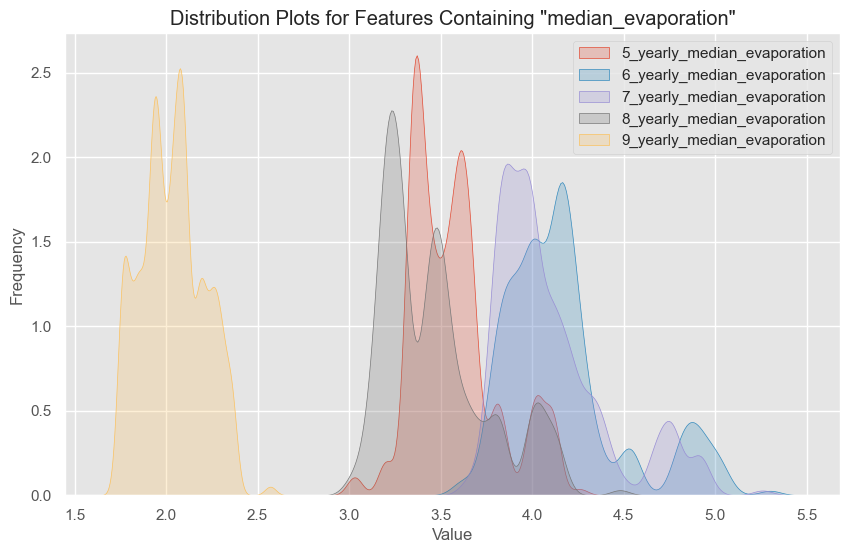

In [128]:
create_combined_distribution_plot(train_data, 'median_evaporation')

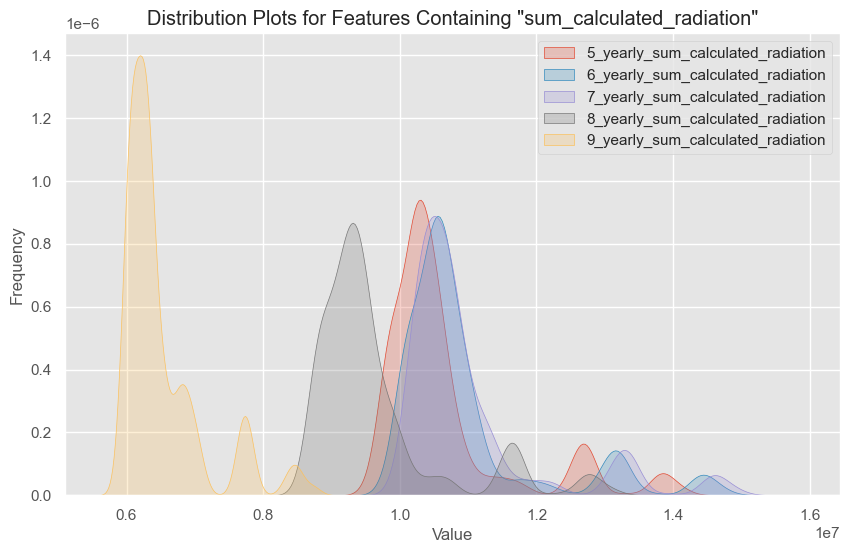

In [129]:
create_combined_distribution_plot(train_data, 'sum_calculated_radiation')

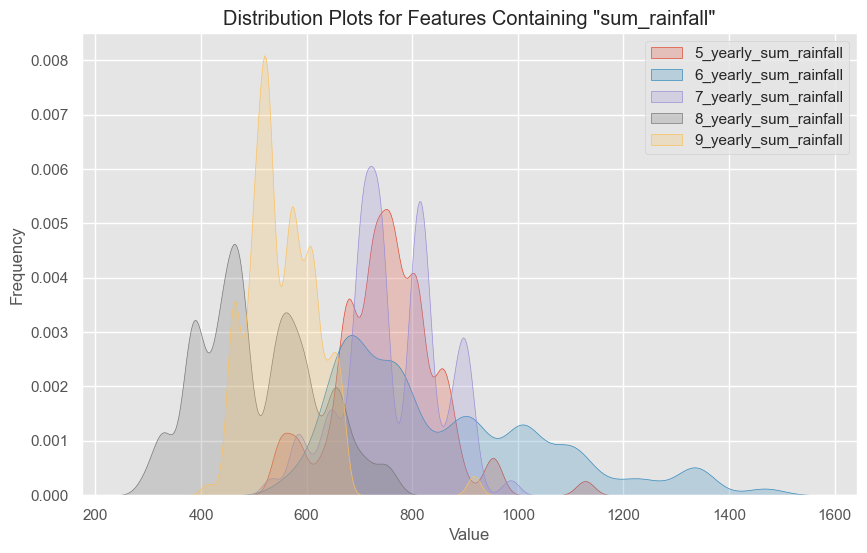

In [130]:
create_combined_distribution_plot(train_data, 'sum_rainfall')

## <center> Null Values imputation

In [131]:
from sklearn.impute import KNNImputer

numeric_df = train_data.select_dtypes(include='number')

columns_to_impute = ['fao', 'phosphorus_fertilizer_amount', 'potassium_fertilizer_amount']

imputer = KNNImputer(n_neighbors=5)

numeric_df_reset_index = numeric_df[columns_to_impute].reset_index(drop=True)

train_data[columns_to_impute] = imputer.fit_transform(numeric_df_reset_index)
test_data[columns_to_impute] = imputer.transform(test_data[columns_to_impute])


## <center> Linear Correlation and Mutual Infromation check

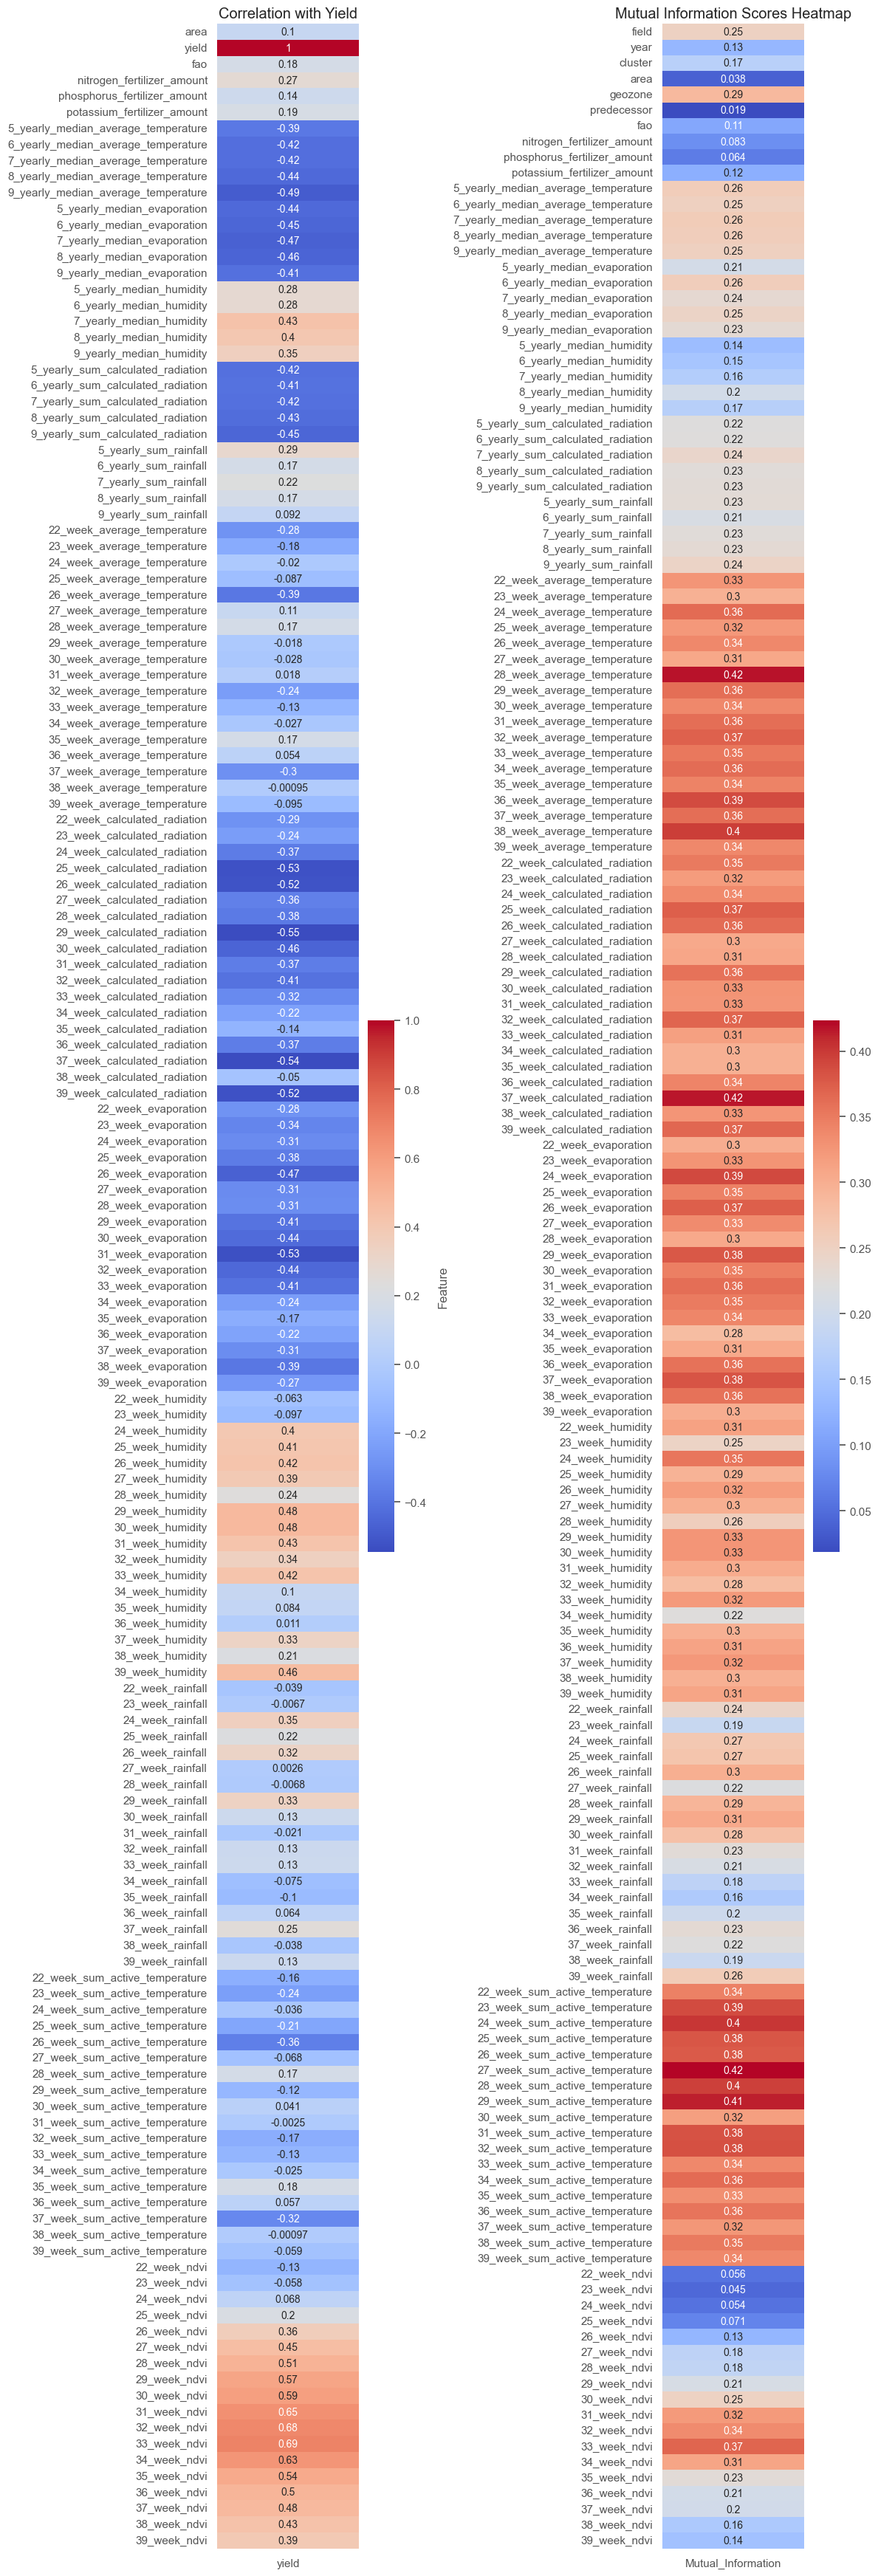

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression


# Correlation heatmap
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 35))

# Plot correlation with 'yield'
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix[['yield']], annot=True, cmap='coolwarm')
plt.title('Correlation with Yield')

# Mutual information heatmap
mi_scores = mutual_info_regression(train_data.drop(['yield'], axis=1), train_data['yield'])

# Create a DataFrame for mutual information scores
mi_scores_df = pd.DataFrame({
    'Feature': train_data.drop(['yield'], axis=1).columns, 
    'Mutual_Information': mi_scores
})

# Plot mutual information scores
plt.subplot(1, 2, 2)
sns.heatmap(
    mi_scores_df.pivot_table(
        index='Feature', 
        values='Mutual_Information'
    ).T[
        train_data.drop(['yield'], axis=1).columns
    ].T, 
    cmap='coolwarm', 
    annot=True
)

plt.title('Mutual Information Scores Heatmap')

plt.tight_layout()
plt.show()


## <center> Check predecessor's impact on used fertilizers

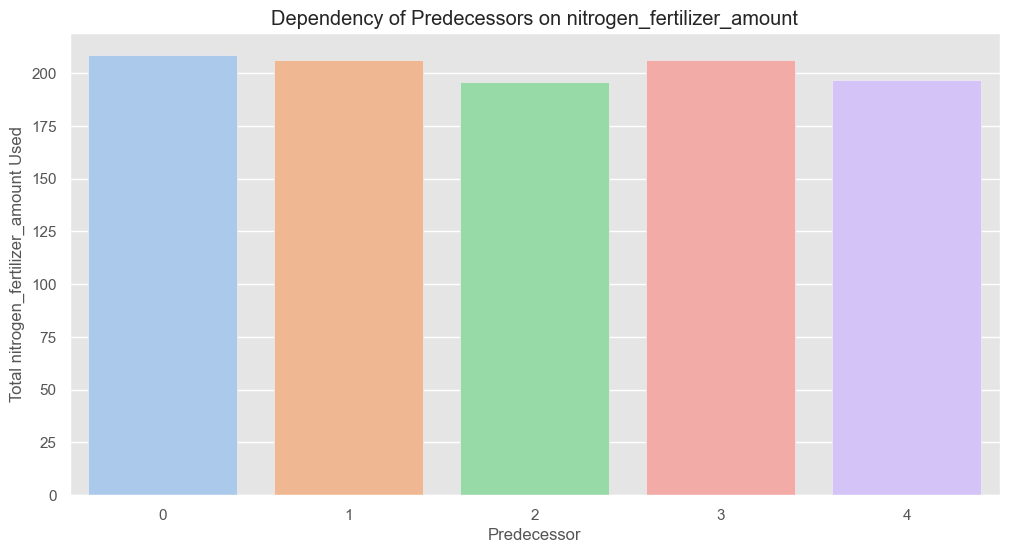

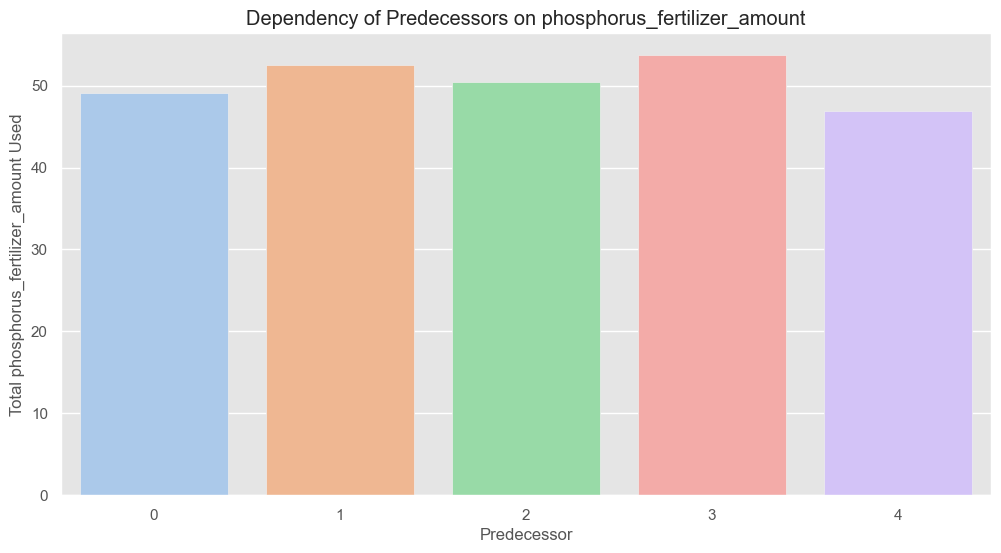

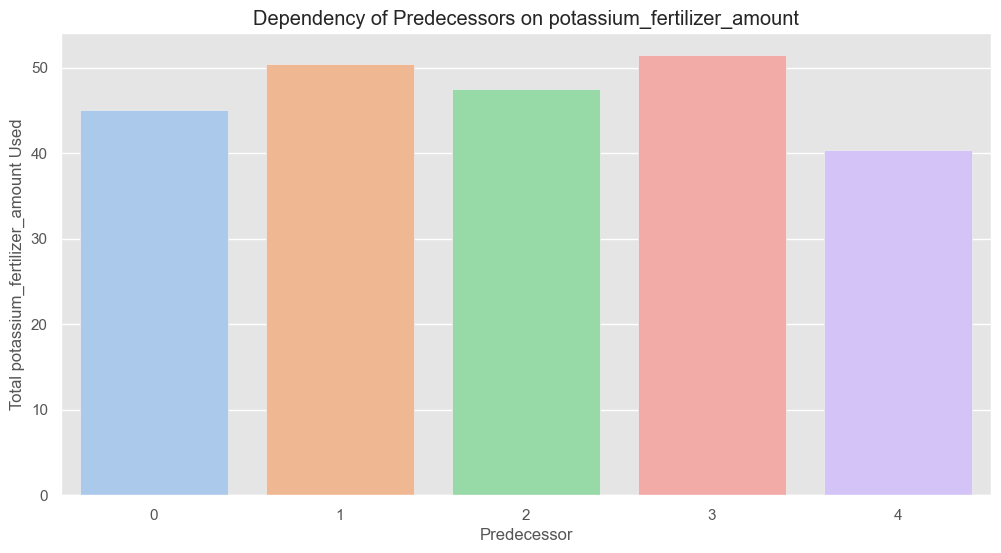

In [133]:
fertilizer_columns = ['nitrogen_fertilizer_amount', 'phosphorus_fertilizer_amount', 'potassium_fertilizer_amount']

predecessor_fertilizer_totals = train_data.groupby('predecessor')[fertilizer_columns].mean().reset_index()

for fertilizer_column in fertilizer_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='predecessor', 
        y=fertilizer_column, 
        data=predecessor_fertilizer_totals, 
        palette='pastel'
    )
    plt.title(f'Dependency of Predecessors on {fertilizer_column}')
    plt.xlabel('Predecessor')
    plt.ylabel(f'Total {fertilizer_column} Used')
    plt.show()

## <center> Feature Filtration

In [134]:
# mutual_info_treshold = 0.35

# selected_features = mi_scores_df[mi_scores_df['Mutual_Information'] >= mutual_info_treshold]['Feature'].tolist()

# train_data = train_data[selected_features + ['yield']]
# test_data = test_data[selected_features + ['yield']]

In [135]:
train_data = train_data[[
    'field', 
    'year', 
    'cluster', 
    'area', 
    'yield', 
    'geozone', 
    'predecessor', 
    'fao',
    '22_week_ndvi', 
    '23_week_ndvi',
    '24_week_ndvi', 
    '25_week_ndvi',
    '26_week_ndvi', 
    '27_week_ndvi', 
    '28_week_ndvi',
    '29_week_ndvi', 
    '30_week_ndvi', 
    '31_week_ndvi', 
    '32_week_ndvi', 
    '33_week_ndvi', 
    '34_week_ndvi', 
    '35_week_ndvi', 
    '36_week_ndvi', 
    '37_week_ndvi', 
    '38_week_ndvi', 
    '39_week_ndvi'
]]

In [136]:
train_data.columns

Index(['field', 'year', 'cluster', 'area', 'yield', 'geozone', 'predecessor', 'fao', '22_week_ndvi', '23_week_ndvi', '24_week_ndvi', '25_week_ndvi', '26_week_ndvi', '27_week_ndvi', '28_week_ndvi', '29_week_ndvi', '30_week_ndvi', '31_week_ndvi', '32_week_ndvi', '33_week_ndvi', '34_week_ndvi', '35_week_ndvi', '36_week_ndvi', '37_week_ndvi', '38_week_ndvi', '39_week_ndvi'], dtype='object')

## <center> Time Series Compression

In [137]:
# def aggregate_metric(metric_name):
#     weeks = [f"{i}_week_{metric_name}" for i in range(22, 40)]

#     metric_columns = train_data.filter(like=metric_name)

#     for i in range(6):
#         start_week = i * 3 + 22
#         end_week = start_week + 2
#         period_columns = [f"{j}_week_{metric_name}" for j in range(start_week, end_week + 1)]

#         train_data[f"{start_week}-{end_week}_period_{metric_name}_mean"] = metric_columns[period_columns].mean(axis=1)

#     train_data.drop(columns=weeks, inplace=True)

# metrics_to_aggregate = ['average_temperature', 'calculated_radiation', 'evaporation', 'humidity', 'rainfall', 'sum_active_temperature', 'ndvi']  # Add other metrics as needed

# for metric in metrics_to_aggregate:
#     aggregate_metric(metric)

## <center> PCA

In [138]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=20)
# X_pca = pca.fit_transform(train_data.drop(['yield'], axis=1))

## <center> Metric creation

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def calculate_regression_metrics(model_name:str, y_test, y_pred):
    # Evaluate the model using different regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Additional metrics
    mape = mean_absolute_percentage_error(y_test, y_pred)
    wmape = mean_absolute_percentage_error(y_test, y_pred, sample_weight=y_test)

    # Display the metrics
    print(f"{model_name} model results:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
    print(f"Weighted Mean Absolute Percentage Error (WMAPE): {wmape * 100:.2f}%")

    # return mae, mse, rmse, r2, mape, wmape

## <center> Train test split

In [140]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['yield', 'year', 'field'], axis=1)
y = train_data['yield']

# Split the data into training and temporary sets (80% training + 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1)

# Split the temporary data into testing and validation sets (50% testing + 50% validation)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_validation.shape, y_validation.shape)


Training set shape: (4549, 23) (4549,)
Testing set shape: (569, 23) (569,)
Validation set shape: (569, 23) (569,)


## <center> Modeling

In [141]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1, enable_categorical=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

calculate_regression_metrics('xgboost', y_test, y_pred)


xgboost model results:
Mean Absolute Error (MAE): 12.10
Mean Squared Error (MSE): 248.21
Root Mean Squared Error (RMSE): 15.75
R-squared (R2): 0.79
Mean Absolute Percentage Error (MAPE): 12.04%
Weighted Mean Absolute Percentage Error (WMAPE): 10.00%


In [142]:
import statsmodels.api as sm

ols_model = sm.OLS(y_train, sm.add_constant(X_train))

ols_results = ols_model.fit()
y_pred_ols = ols_results.predict(sm.add_constant(X_test))

calculate_regression_metrics('ols', y_test, y_pred_ols)


ols model results:
Mean Absolute Error (MAE): 14.83
Mean Squared Error (MSE): 364.17
Root Mean Squared Error (RMSE): 19.08
R-squared (R2): 0.69
Mean Absolute Percentage Error (MAPE): 15.49%
Weighted Mean Absolute Percentage Error (WMAPE): 12.26%


In [143]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

calculate_regression_metrics('random forest regressor', y_test, y_pred)


random forest regressor model results:
Mean Absolute Error (MAE): 12.59
Mean Squared Error (MSE): 261.87
Root Mean Squared Error (RMSE): 16.18
R-squared (R2): 0.78
Mean Absolute Percentage Error (MAPE): 12.77%
Weighted Mean Absolute Percentage Error (WMAPE): 10.41%


In [144]:
import lightgbm as lgb

model = lgb.LGBMRegressor(random_state=1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

calculate_regression_metrics('lightgbm regressor', y_test, y_pred)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4961
[LightGBM] [Info] Number of data points in the train set: 4549, number of used features: 23
[LightGBM] [Info] Start training from score 121.113529
lightgbm regressor model results:
Mean Absolute Error (MAE): 12.32
Mean Squared Error (MSE): 249.13
Root Mean Squared Error (RMSE): 15.78
R-squared (R2): 0.79
Mean Absolute Percentage Error (MAPE): 12.45%
Weighted Mean Absolute Percentage Error (WMAPE): 10.19%


## <center> Hypertuning Lightgbm model

In [145]:
import optuna

def objective(trial, X_train, y_train):
    params = {
        'objective': 'regression',
        'metric': 'r2',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 1, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 1, 1000),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'verbosity': -1,
        'random_state': 1
    }
    
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_validation)
    rmse = mean_squared_error(y_validation, y_pred, squared=False)

    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50)

best_params = study.best_params

final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("Best Parameters:", best_params)
calculate_regression_metrics('lightgbm regressor', y_test, y_pred)


[I 2024-01-08 15:06:22,341] A new study created in memory with name: no-name-79a7b508-8ddd-4117-9f5d-0789928bc14a
[I 2024-01-08 15:06:26,928] Trial 0 finished with value: 19.946160396382037 and parameters: {'learning_rate': 0.10439397947853629, 'n_estimators': 701, 'num_leaves': 1000, 'feature_fraction': 0.14203426921490628, 'bagging_fraction': 0.7721689004326165, 'min_child_samples': 5, 'reg_alpha': 0.2697695068864542, 'reg_lambda': 0.8503142187660457}. Best is trial 0 with value: 19.946160396382037.
[I 2024-01-08 15:06:27,829] Trial 1 finished with value: 17.59204532279183 and parameters: {'learning_rate': 0.16591390754333302, 'n_estimators': 177, 'num_leaves': 545, 'feature_fraction': 0.20785264837248485, 'bagging_fraction': 0.7813659778177016, 'min_child_samples': 14, 'reg_alpha': 0.6906770380887947, 'reg_lambda': 0.5413378887102629}. Best is trial 1 with value: 17.59204532279183.
[I 2024-01-08 15:06:27,941] Trial 2 finished with value: 16.336653180941312 and parameters: {'learning

[LightGBM] [Warning] feature_fraction is set=0.5954634227637591, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5954634227637591
[LightGBM] [Warning] bagging_fraction is set=0.7640152731635369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7640152731635369
[LightGBM] [Warning] feature_fraction is set=0.5954634227637591, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5954634227637591
[LightGBM] [Warning] bagging_fraction is set=0.7640152731635369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7640152731635369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4961
[LightGBM] [Info] Number of data points in the train set: 4549, number of used features: 23
[LightGBM] [Info] Start training from score 121.113529
[LightGBM] [Warning] No further splits with positive ga

## <center> SHAP

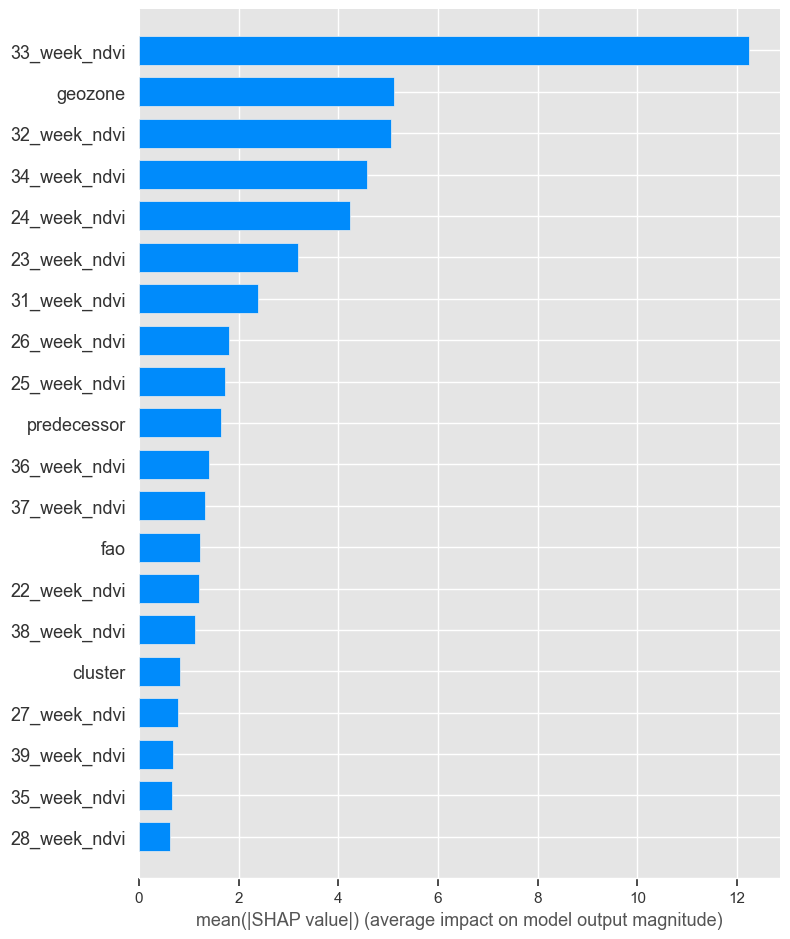

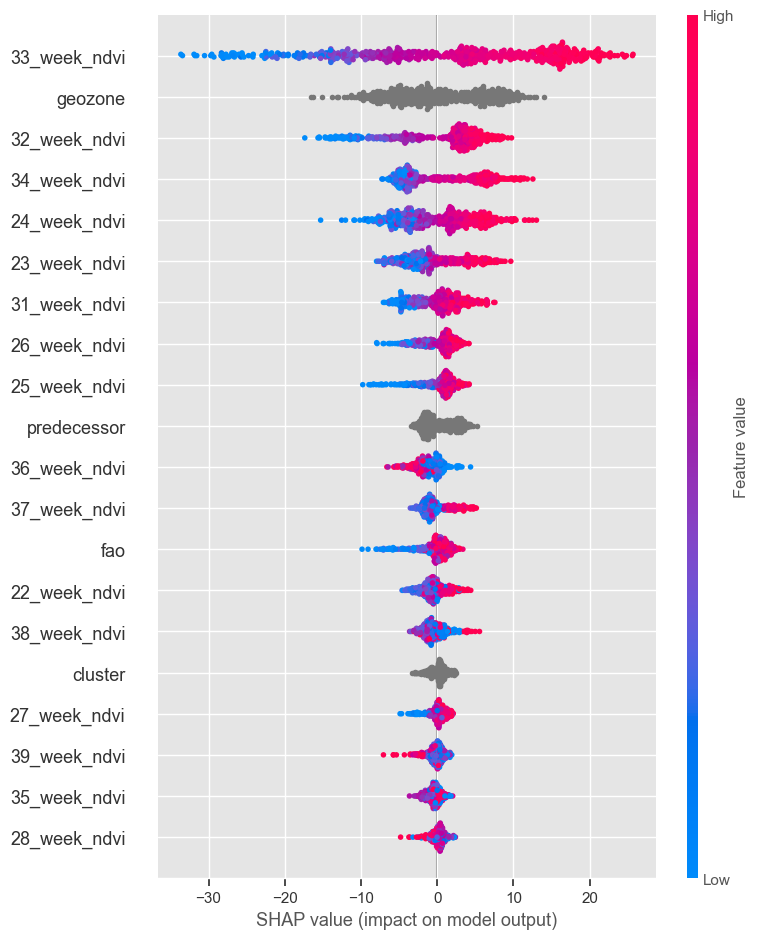

In [146]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)